In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
import joblib
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 8)

print("=" * 70)
print("IPL PLAYER PERFORMANCE PREDICTION - ML MODEL")
print("=" * 70)

# Load processed data
player_stats = pd.read_csv('../data/player_statistics.csv')

print(f"\n✓ Player statistics loaded: {player_stats.shape}")
print("=" * 70)

IPL PLAYER PERFORMANCE PREDICTION - ML MODEL

✓ Player statistics loaded: (299, 18)


In [3]:
print("\nPREPARING DATA FOR ML MODEL")
print("=" * 70)

# Focus on batsmen
batsmen_ml = player_stats[player_stats['role'].isin(['Batsman', 'All-rounder'])].copy()
batsmen_ml = batsmen_ml[batsmen_ml['total_runs'] > 200]

# Create target: High performer if batting average > 25
batsmen_ml['high_performer'] = (batsmen_ml['batting_average'] > 25).astype(int)

# Select features
ml_features = [
    'strike_rate', 'fours', 'sixes', 'balls_faced', 
    'matches_played', 'times_out'
]

X = batsmen_ml[ml_features]
y = batsmen_ml['high_performer']

print(f"\n✓ Dataset prepared:")
print(f"  • Total players: {len(batsmen_ml)}")
print(f"  • Features: {len(ml_features)}")
print(f"\n📊 Target Distribution:")
print(f"  • High performers (avg > 25): {(y==1).sum()} ({(y==1).sum()/len(y)*100:.1f}%)")
print(f"  • Regular performers: {(y==0).sum()} ({(y==0).sum()/len(y)*100:.1f}%)")

print(f"\n📋 Features: {ml_features}")
print(f"\n📊 Sample Data:")
print(batsmen_ml[['player', 'batting_average', 'strike_rate', 'high_performer']].head(10).to_string(index=False))


PREPARING DATA FOR ML MODEL

✓ Dataset prepared:
  • Total players: 195
  • Features: 6

📊 Target Distribution:
  • High performers (avg > 25): 92 (47.2%)
  • Regular performers: 103 (52.8%)

📋 Features: ['strike_rate', 'fours', 'sixes', 'balls_faced', 'matches_played', 'times_out']

📊 Sample Data:
        player  batting_average  strike_rate  high_performer
       V Kohli            36.76       128.51               1
      S Dhawan            34.89       123.45               1
     RG Sharma            28.58       127.92               1
     DA Warner            40.04       135.43               1
      SK Raina            32.95       132.54               1
      MS Dhoni            35.19       132.84               1
AB de Villiers            41.45       148.58               1
      CH Gayle            39.04       142.12               1
    RV Uthappa            26.92       126.15               1
    KD Karthik            25.62       131.35               1


In [4]:
print("\n" + "=" * 70)
print("TRAINING ML MODELS")
print("=" * 70)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\n✓ Data split (80-20):")
print(f"  • Training: {len(X_train)} players")
print(f"  • Testing: {len(X_test)} players")

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# MODEL 1: Random Forest
print(f"\n🤖 Training Model 1: Random Forest...")
rf_model = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)
rf_accuracy = accuracy_score(y_test, y_pred_rf)

print(f"✓ Random Forest Accuracy: {rf_accuracy:.2%}")

# MODEL 2: Logistic Regression
print(f"\n🤖 Training Model 2: Logistic Regression...")
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)
lr_accuracy = accuracy_score(y_test, y_pred_lr)

print(f"✓ Logistic Regression Accuracy: {lr_accuracy:.2%}")

# Compare Models
print(f"\n" + "=" * 70)
print("MODEL COMPARISON")
print("=" * 70)

comparison = pd.DataFrame({
    'Model': ['Random Forest', 'Logistic Regression'],
    'Accuracy': [rf_accuracy, lr_accuracy]
}).sort_values('Accuracy', ascending=False)

print(comparison.to_string(index=False))

best_model_name = comparison.iloc[0]['Model']
best_accuracy = comparison.iloc[0]['Accuracy']
print(f"\n🏆 Best Model: {best_model_name} ({best_accuracy:.2%})")

# Use Random Forest as best model
best_model = rf_model
y_pred_best = y_pred_rf

print(f"\n📋 Detailed Classification Report (Random Forest):")
print(classification_report(y_test, y_pred_best, 
                          target_names=['Regular Performer', 'High Performer']))

print(f"\n🔢 Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred_best)
print(cm)


TRAINING ML MODELS

✓ Data split (80-20):
  • Training: 156 players
  • Testing: 39 players

🤖 Training Model 1: Random Forest...
✓ Random Forest Accuracy: 84.62%

🤖 Training Model 2: Logistic Regression...
✓ Logistic Regression Accuracy: 82.05%

MODEL COMPARISON
              Model  Accuracy
      Random Forest  0.846154
Logistic Regression  0.820513

🏆 Best Model: Random Forest (84.62%)

📋 Detailed Classification Report (Random Forest):
                   precision    recall  f1-score   support

Regular Performer       0.89      0.81      0.85        21
   High Performer       0.80      0.89      0.84        18

         accuracy                           0.85        39
        macro avg       0.85      0.85      0.85        39
     weighted avg       0.85      0.85      0.85        39


🔢 Confusion Matrix:
[[17  4]
 [ 2 16]]



FEATURE IMPORTANCE ANALYSIS

🌟 Feature Importance (Random Forest):
       Feature  Importance
   balls_faced    0.245162
         fours    0.214434
         sixes    0.178634
     times_out    0.150728
   strike_rate    0.120467
matches_played    0.090575


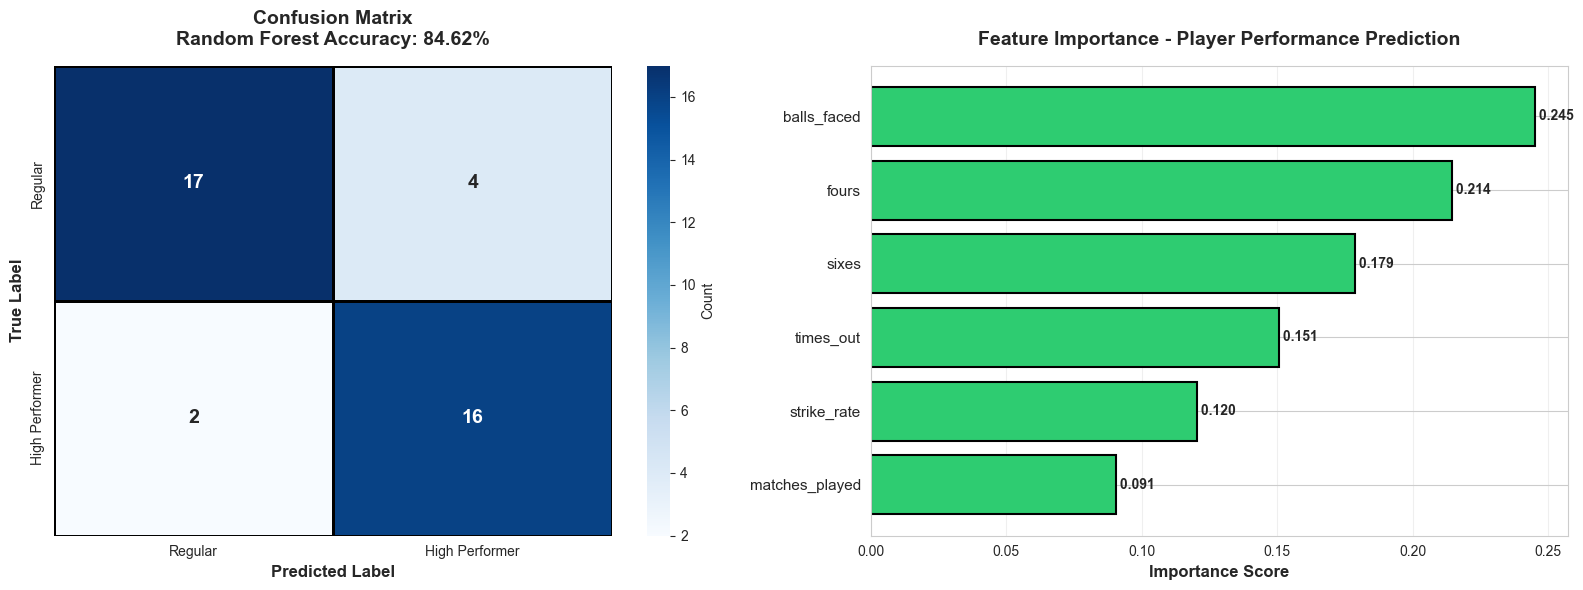


✓ Visualization saved: outputs/visualizations/ml_model_results.png

💾 Models saved:
  • models/player_performance_model.pkl
  • models/player_scaler.pkl

✓ ML MODEL TRAINING COMPLETE!


In [5]:
print("\n" + "=" * 70)
print("FEATURE IMPORTANCE ANALYSIS")
print("=" * 70)

# Get feature importance
feature_importance = pd.DataFrame({
    'Feature': ml_features,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print(f"\n🌟 Feature Importance (Random Forest):")
print(feature_importance.to_string(index=False))

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 1. Confusion Matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['Regular', 'High Performer'], 
            yticklabels=['Regular', 'High Performer'],
            cbar_kws={'label': 'Count'}, linewidths=2, linecolor='black',
            annot_kws={'fontsize': 14, 'fontweight': 'bold'})
axes[0].set_xlabel('Predicted Label', fontweight='bold', fontsize=12)
axes[0].set_ylabel('True Label', fontweight='bold', fontsize=12)
axes[0].set_title(f'Confusion Matrix\nRandom Forest Accuracy: {rf_accuracy:.2%}', 
                 fontweight='bold', fontsize=14, pad=15)

# 2. Feature Importance
axes[1].barh(range(len(feature_importance)), feature_importance['Importance'], 
            color='#2ecc71', edgecolor='black', linewidth=1.5)
axes[1].set_yticks(range(len(feature_importance)))
axes[1].set_yticklabels(feature_importance['Feature'], fontsize=11)
axes[1].set_xlabel('Importance Score', fontweight='bold', fontsize=12)
axes[1].set_title('Feature Importance - Player Performance Prediction', 
                 fontweight='bold', fontsize=14, pad=15)
axes[1].invert_yaxis()
axes[1].grid(axis='x', alpha=0.3)

for i, (idx, row) in enumerate(feature_importance.iterrows()):
    axes[1].text(row['Importance'], i, f" {row['Importance']:.3f}", 
                va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig('../outputs/visualizations/ml_model_results.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\n✓ Visualization saved: outputs/visualizations/ml_model_results.png")

# Save models
joblib.dump(rf_model, '../models/player_performance_model.pkl')
joblib.dump(scaler, '../models/player_scaler.pkl')

print(f"\n💾 Models saved:")
print(f"  • models/player_performance_model.pkl")
print(f"  • models/player_scaler.pkl")

print("\n" + "=" * 70)
print("✓ ML MODEL TRAINING COMPLETE!")
print("=" * 70)